<a href="https://colab.research.google.com/github/gnidetsanna/python_for_ML_tasks/blob/main/HW_2_4_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_hnidets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Завдання 1.###
Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

medical_df = pd.read_csv('/content/drive/MyDrive/Homeworks/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

###Метод МНК###

In [3]:
X = np.expand_dims(non_smoker_df['age'].values, axis=1)
y = non_smoker_df['charges'].values
X,y
X.shape

(1064, 1)

In [4]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [5]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([[18],
        [28],
        [33]]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [6]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [7]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [8]:
np.dot(X_with_intercept[0], MNK_coefs)

2719.059874396516

In [9]:
predictions_MNK_1 = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK_1

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

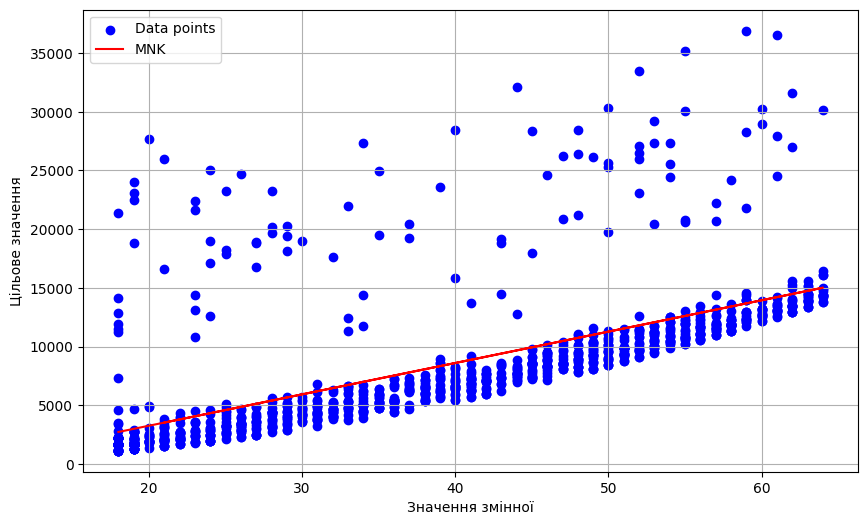

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK_1, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

###Варіант через polyfit###

In [11]:
age = non_smoker_df['age'].values
charges = non_smoker_df['charges'].values

# Виконуємо лінійну регресію (поліном 1-го степеня)
coefficients = np.polyfit(age, charges, 1)
print(coefficients)

# Коефіцієнти лінійної регресії
slope = coefficients[0]
intercept = coefficients[1]

print(f"Найкраща лінія: charges = {slope} * age + {intercept}")

[  267.24891283 -2091.42055657]
Найкраща лінія: charges = 267.2489128311996 * age + -2091.420556565088


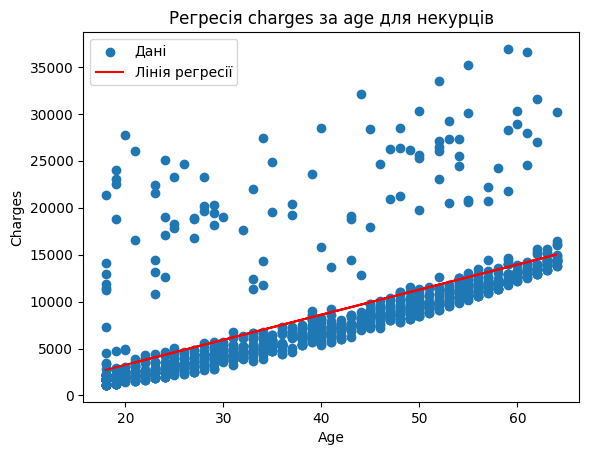

In [12]:
# Побудова лінії регресії
import matplotlib.pyplot as plt

plt.scatter(age, charges, label='Дані')
plt.plot(age, slope * age + intercept, color='red', label='Лінія регресії')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Регресія charges за age для некурців')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y, predictions_MNK_1)
rmse = mean_squared_error(y, predictions_MNK_1, squared=False)
mae = mean_absolute_error(y, predictions_MNK_1)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


###Full-Batch градієнтного спуску###

In [15]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.001, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors



###Перша спроба###

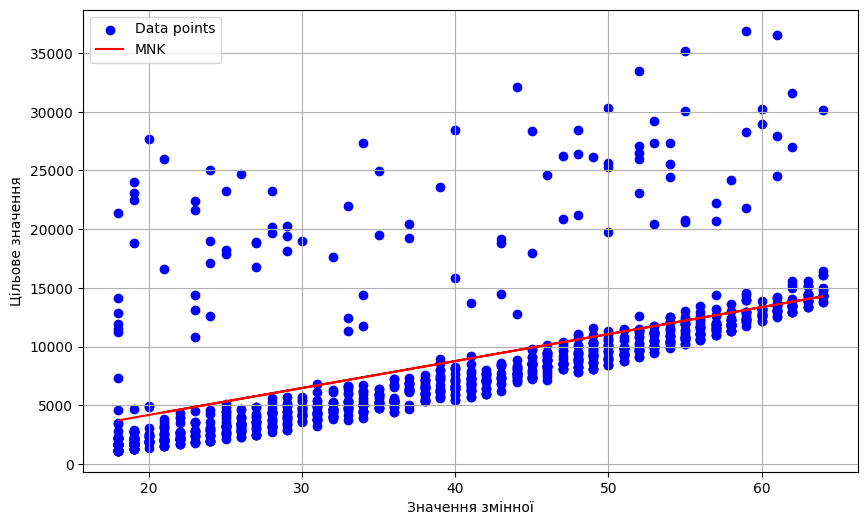

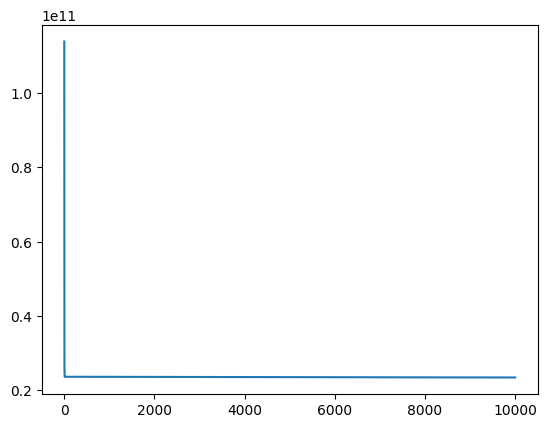

In [47]:
m, b, errors_1 = full_batch_gradient_descent(X, y, lr=0.0001, epochs=10000)
predictions_fbgd_1 = m * X[:, 0] + b

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_fbgd_1, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(errors_1);

In [38]:
predictions_fbgd_1, m, b

(array([3713.18681389, 6009.3076885 , 7157.3681258 , ..., 3713.18681389,
        3713.18681389, 4402.02307627]),
 229.6120874611436,
 -419.83076041335335)

In [41]:
r2 = r2_score(y, predictions_fbgd_1)
rmse = mean_squared_error(y, predictions_fbgd_1, squared=False)
mae = mean_absolute_error(y, predictions_fbgd_1)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4696.33
Mean Absolute Error: 2756.21


###Друга спроба###

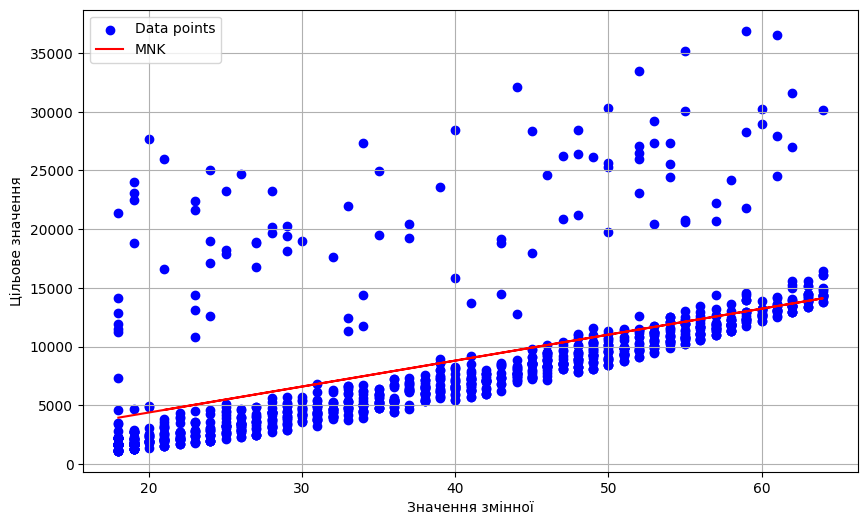

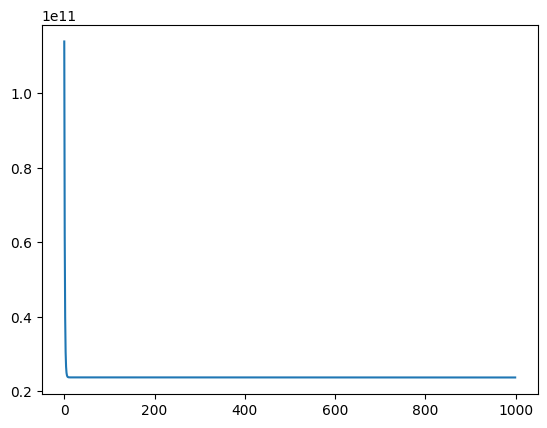

In [48]:
m, b, errors_2 = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
predictions_fbgd_2 = m * X[:, 0] + b

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_fbgd_2, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(errors_2);

In [27]:
predictions_fbgd_2, m, b

(array([3937.9012503 , 6148.94709409, 7254.47001599, ..., 3937.9012503 ,
        3937.9012503 , 4601.21500344]),
 221.1045843794301,
 -41.98126853149978)

In [42]:
r2 = r2_score(y, predictions_fbgd_2)
rmse = mean_squared_error(y, predictions_fbgd_2, squared=False)
mae = mean_absolute_error(y, predictions_fbgd_2)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.38
Root Mean Squared Error: 4713.25
Mean Absolute Error: 2803.85


###Третя спроба###

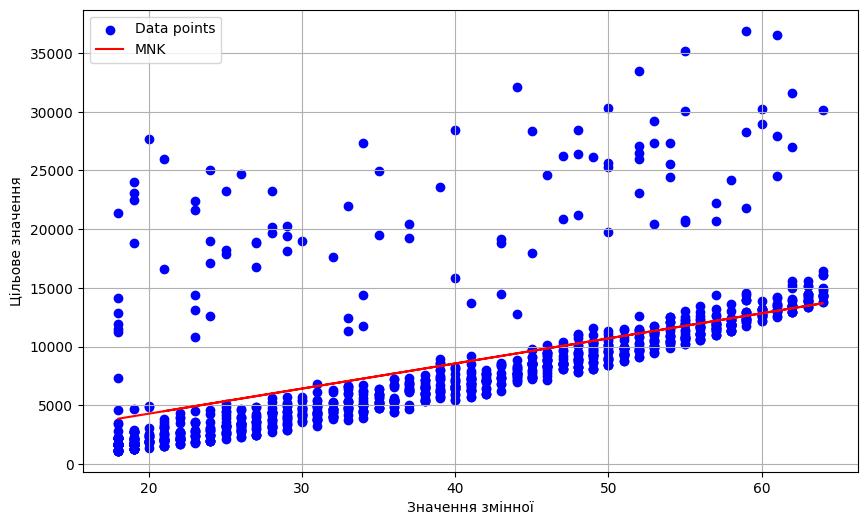

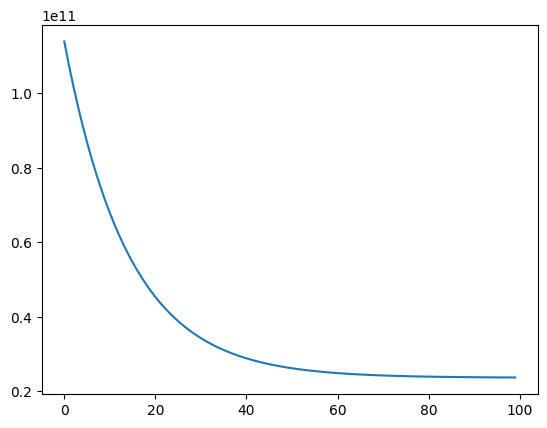

In [49]:
m, b, errors_3 = full_batch_gradient_descent(X, y, lr=0.00001, epochs=100)
predictions_fbgd_3 = m * X[:, 0] + b

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_fbgd_3, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(errors_3);

In [34]:
predictions_fbgd_3, m, b

(array([3853.11330579, 5991.32101656, 7060.42487195, ..., 3853.11330579,
        3853.11330579, 4494.57561902]),
 213.82077107785156,
 4.339426385055139)

In [43]:
r2 = r2_score(y, predictions_fbgd_3)
rmse = mean_squared_error(y, predictions_fbgd_3, squared=False)
mae = mean_absolute_error(y, predictions_fbgd_3)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.38
Root Mean Squared Error: 4722.78
Mean Absolute Error: 2680.47


###Стохастичний###

In [55]:
def stochastic_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Initial parameters
    n = len(y)
    for _ in range(epochs):
        for i in range(n):
            x_i = X[i, 0]  # Assuming X is a 2D array with one feature column
            y_i = y[i]
            y_pred_i = m * x_i + b
            error_i = y_pred_i - y_i
            m_gradient = 2 * error_i * x_i
            b_gradient = 2 * error_i
            m -= lr * m_gradient
            b -= lr * b_gradient
    return m, b

m, b = stochastic_gradient_descent(X, y, lr=0.0001, epochs=5000)
predictions_sgd = m * X[:, 0] + b

In [56]:
r2 = r2_score(y, predictions_sgd)
rmse = mean_squared_error(y, predictions_sgd, squared=False)
mae = mean_absolute_error(y, predictions_sgd)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4693.37
Mean Absolute Error: 2257.01


###З scikit-learn.LinearRegression###

In [44]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X, y)

LinearRegression()

In [46]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [51]:
predictions_sklearn = lin_reg.predict(X)
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

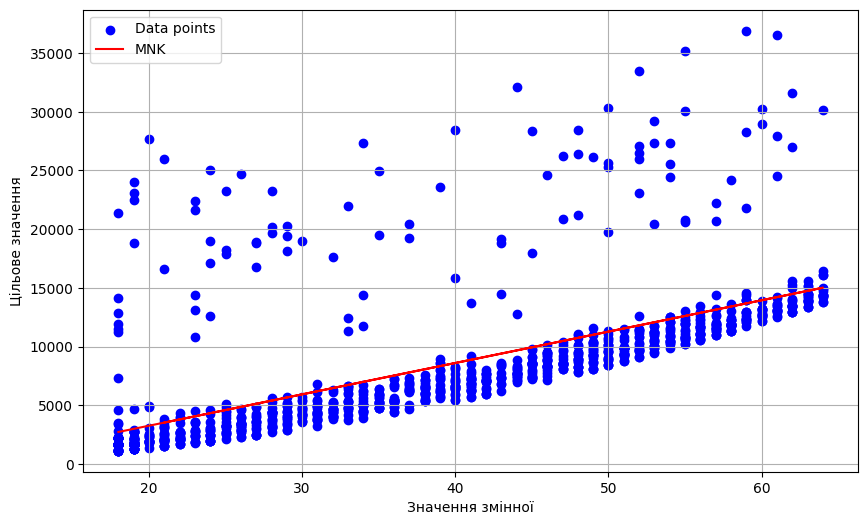

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
r2 = r2_score(y, predictions_sklearn)
rmse = mean_squared_error(y, predictions_sklearn, squared=False)
mae = mean_absolute_error(y, predictions_sklearn)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


###Підсумок завдання 1###

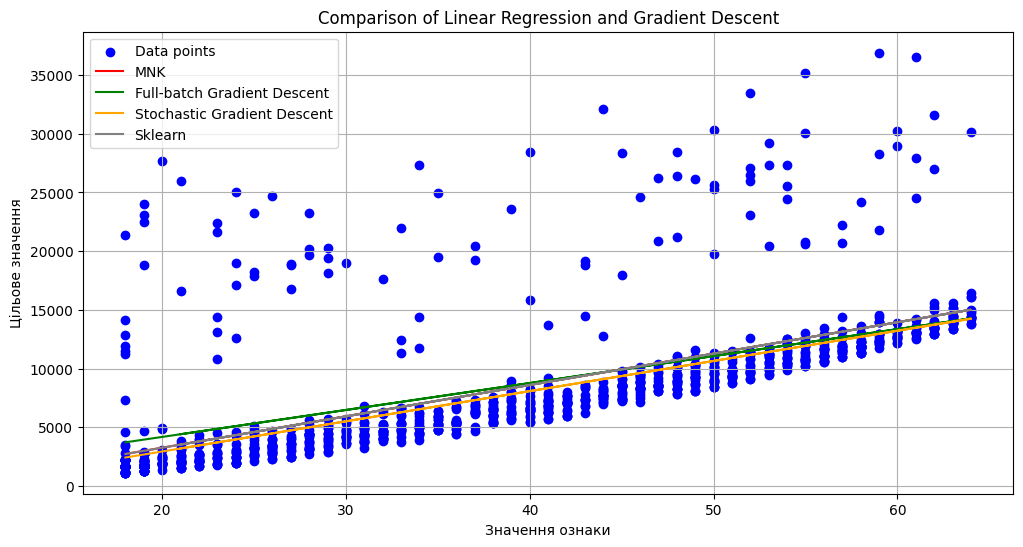

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK_1, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd_1, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sgd, color='orange', label='Stochastic Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

###Висновок###
Всі методи дали хороший результат, проте МНК і scilit-learn дали ідентичний результат RMSE, дещо відстає від них ефективність градієнтого спуску. В цілому всі лінії лежать дуже близько один від одної.

###Завдання 2###
Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [59]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X_s = np.expand_dims(smoker_df['age'].values, axis=1)
y_s = smoker_df['charges'].values

In [60]:
lin_reg.fit(X_s, y_s)

LinearRegression()

In [61]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), 20294.128126915966)

In [63]:
predictions_sklearn_s = lin_reg.predict(X_s)
predictions_sklearn_s[:2]

array([26093.642567  , 39218.85945773])

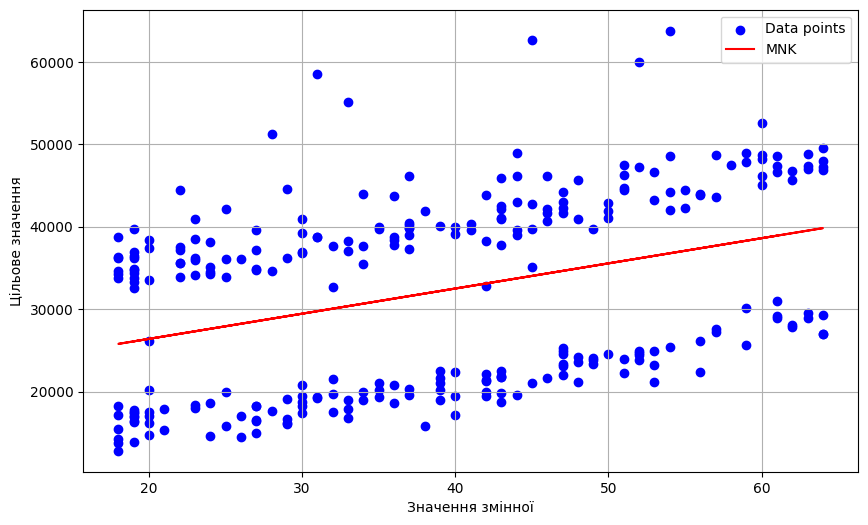

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(X_s[:, 0], y_s, color='blue', label='Data points')
plt.plot(X_s[:, 0], predictions_sklearn_s, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
r2 = r2_score(y, predictions_sklearn_s)
rmse = mean_squared_error(y, predictions_sklearn_s, squared=False)
mae = mean_absolute_error(y, predictions_sklearn_s)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.14
Root Mean Squared Error: 10711.00
Mean Absolute Error: 10097.80


###Висновок###
Модель побудувала прогноз із великим значенням RMSE,
так як в моделі для некурців ми досягали значно меншого значення, для цього набору даних необхідно провести або масштабування, або вибрати інший підхід до створення моделі, адже дані чітко поділені на дві групи - 0-25 тисяч і 30-50 тисяч. Треба подивитись з чим корелює даний поділ клієнтів.